### Basic library imports

In [5]:
import os
import pandas as pd

### Read Dataset

In [6]:
DATASET_FOLDER = '../dataset/'
train = pd.read_csv(os.path.join(DATASET_FOLDER, 'train.csv'))
test = pd.read_csv(os.path.join(DATASET_FOLDER, 'test.csv'))
sample_test = pd.read_csv(os.path.join(DATASET_FOLDER, 'sample_test.csv'))
sample_test_out = pd.read_csv(os.path.join(DATASET_FOLDER, 'sample_test_out.csv'))

### Run Sanity check using src/sanity.py

In [7]:
!python sanity.py --test_filename ../dataset/sample_test.csv --output_filename ../dataset/sample_test_out.csv

Parsing successfull for file: ../dataset/sample_test_out.csv


In [8]:
!python sanity.py --test_filename ../dataset/sample_test.csv --output_filename ../dataset/sample_test_out_fail.csv

Error: Invalid unit [lbs] found in 6.75 lbs. Allowed units: {'volt', 'pint', 'cubic inch', 'ton', 'litre', 'watt', 'gram', 'gallon', 'quart', 'centimetre', 'inch', 'imperial gallon', 'decilitre', 'metre', 'fluid ounce', 'microlitre', 'foot', 'ounce', 'cup', 'yard', 'cubic foot', 'milligram', 'centilitre', 'millivolt', 'kilogram', 'microgram', 'kilovolt', 'millimetre', 'kilowatt', 'pound', 'millilitre'}


### Download images

In [ ]:
from utils import download_images
download_images(sample_test['image_link'], '../images')

In [9]:
from utils import process_images_with_easyocr

# Process images and extract quantitative data
ocr_results = process_images_with_easyocr('../images')

# Print extracted quantitative data
for image_name, data in ocr_results.items():
    print(f"Quantitative data extracted from {image_name}: {data}")

c:\Users\HELLO\AppData\Local\Programs\Python\Python310\lib\site-packages\easyocr\detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyState

Quantitative data extracted from 41-NCxNuBxL.jpg: {}
Quantitative data extracted from 417NJrPEk+L.jpg: {}
Quantitative data extracted from 417SThj+SrL.jpg: {}
Quantitative data extracted from 41ADVPQgZOL.jpg: {}
Quantitative data extracted from 41nblnEkJ3L.jpg: {}
Quantitative data extracted from 41o3iis9E7L.jpg: {}
Quantitative data extracted from 41pvwR9GbaL.jpg: {}
Quantitative data extracted from 41uwo4PVnuL.jpg: {}
Quantitative data extracted from 41ygXRvf8lL.jpg: {}
Quantitative data extracted from 41zgjN+zW3L.jpg: {}
Quantitative data extracted from 51+oHGvSvuL.jpg: {}
Quantitative data extracted from 51-WIOx5pxL.jpg: {}
Quantitative data extracted from 510xYFNYQ8L.jpg: {}
Quantitative data extracted from 514bY8c4ZIL.jpg: {}
Quantitative data extracted from 514pScQdlCL.jpg: {}
Quantitative data extracted from 51BEuVR4ZzL.jpg: {}
Quantitative data extracted from 51bEy0J5wLL.jpg: {}
Quantitative data extracted from 51cPZYLk2YL.jpg: {}
Quantitative data extracted from 51EBBqNOJ1L.j

In [ ]:
# Shivansh pytesseract
from utils import process_images_with_ocr

ocr_results = process_images_with_ocr(sample_test['image_link'], '../del_images')

for image_name, text in ocr_results.items():
    print(f"Text extracted from {image_name}: {text}")

In [ ]:
assert len(os.listdir('../images')) > 0

In [15]:
rm -rf ../images

In [10]:
import easyocr
import re

# Load EasyOCR model
reader = easyocr.Reader(['en'])

# Define allowed units based on entity type (you can expand this)
units_dict = {
    'width': ['millimetre', 'centimetre', 'metre', 'inch', 'foot', 'yard'],
    'depth': ['millimetre', 'centimetre', 'metre', 'inch', 'foot', 'yard'],
    'height': ['millimetre', 'centimetre', 'metre', 'inch', 'foot', 'yard'],
    'voltage': ['volt', 'kilovolt', 'millivolt'],
    'wattage': ['watt', 'kilowatt'],
    'item_weight': ['gram', 'kilogram', 'ton', 'pound'],
    'maximum_weight_recommendation': ['gram', 'kilogram', 'ton', 'pound']
}

# Function to extract the prediction from OCR and process it
def predictor(image_link, entity_name):
    # Perform OCR to extract text from the image
    ocr_result = reader.readtext(image_link, detail=0)
    
    # Join OCR results into a single string for easier searching
    ocr_text = " ".join(ocr_result).lower()
    
    # Get allowed units for the given entity
    allowed_units = units_dict.get(entity_name, [])
    
    # Regex pattern to match value followed by unit (for any of the allowed units)
    pattern = r'(\d+\.?\d*)\s?(' + '|'.join(allowed_units) + ')'
    
    # Search for the pattern in the OCR text
    match = re.search(pattern, ocr_text)
    
    if match:
        value = match.group(1)  # Extract the value
        unit = match.group(2)   # Extract the unit
        return f"{value} {unit}"
    
    # Return empty string if no match is found
    return ""

# Sample usage
image_link = "https://m.media-amazon.com/images/I/41-NCxNuBxL.jpg"
entity_name = "width"
prediction = predictor(image_link, entity_name)
print(prediction)
predictor("https://m.media-amazon.com/images/I/41-NCxNuBxL.jpg", "width")

ocr_result = reader.readtext(image_link, detail=0)
print("OCR Output:", ocr_result)
import cv2
from PIL import Image
import numpy as np

# Download image
image_path = '../images/41-NCxNuBxL.jpg'
image = Image.open(image_path)

# Convert to grayscale
gray = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Save the processed image (optional)
cv2.imwrite("processed_image.jpg", thresh)

# Pass the processed image to EasyOCR
ocr_result = reader.readtext(thresh, detail=0)
print("OCR Output:", ocr_result)


Progress: |█████████████████████████████████████████████████████| 107.0% Complete
Progress: |█████████████████████████████████████████████████████| 107.0% CompleteOCR Output: ['2OCM', '1SCM']
OCR Output: ['2OCM', '15CM']


### Working Code (Not for all but for more than 1)

In [18]:
import easyocr
import re
import cv2
from PIL import Image
import numpy as np
import os

# Load EasyOCR model
reader = easyocr.Reader(['en'])

# Updated entity-unit map
entity_unit_map = {
    "width": {"centimetre", "foot", "millimetre", "metre", "inch", "yard"},
    "depth": {"centimetre", "foot", "millimetre", "metre", "inch", "yard"},
    "height": {"centimetre", "foot", "millimetre", "metre", "inch", "yard"},
    "item_weight": {"milligram", "kilogram", "microgram", "gram", "ounce", "ton", "pound"},
    "maximum_weight_recommendation": {"milligram", "kilogram", "microgram", "gram", "ounce", "ton", "pound"},
    "voltage": {"millivolt", "kilovolt", "volt"},
    "wattage": {"kilowatt", "watt"},
    "item_volume": {"cubic foot", "microlitre", "cup", "fluid ounce", "centilitre", "imperial gallon", "pint", "decilitre", "litre", "millilitre", "quart", "cubic inch", "gallon"}
}

# Function to extract the prediction from OCR and process it
def predictor(image_path):
    # Open the image and apply preprocessing
    image = Image.open(image_path)
    gray = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

    # Perform OCR to extract text from the processed image
    ocr_result = reader.readtext(thresh, detail=0)
    
    # Join OCR results into a single string for easier searching
    ocr_text = " ".join(ocr_result).lower()

    # Results to store predictions
    results = []

    # Loop through the entity_unit_map and try to find any matches
    for entity_name, allowed_units in entity_unit_map.items():
        # Build regex pattern for matching the entity and allowed units
        pattern = r'(\d+\.?\d*)\s?(' + '|'.join(allowed_units) + ')'
        
        # Search for the pattern in the OCR text
        match = re.search(pattern, ocr_text)
        
        if match:
            value = match.group(1)  # Extract the value
            unit = match.group(2)   # Extract the unit
            results.append(f"{entity_name}: {value} {unit}")
    
    # If results are found, return them, otherwise return empty string
    if results:
        return " ".join(results)
    else:
        return ""


# Automatically get all image paths from the 'images' folder
image_folder = '../del_images'  # Replace with your folder path
image_paths = [os.path.join(image_folder, fname) for fname in os.listdir(image_folder) if fname.endswith(('.jpg', '.png', '.jpeg'))]

# Process all images and print results
for idx, image_path in enumerate(image_paths, 1):
    result = predictor(image_path)
    if result:
        print(f"{idx}. {result}")
    else:
        print(f"{idx}. No entities detected")


c:\Users\HELLO\AppData\Local\Programs\Python\Python310\lib\site-packages\easyocr\detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyState

1. No entities detected
2. No entities detected
3. No entities detected
4. No entities detected
5. No entities detected


In [10]:
# Shivansh's code

import easyocr
import re
import os
import cv2
from PIL import Image

# Load EasyOCR model
reader = easyocr.Reader(['en'])

# Map short forms to full forms
unit_abbreviation_map = {
    'cm': 'centimetre',
    'mm': 'millimetre',
    'm': 'metre',
    'kg': 'kilogram',
    'g': 'gram',
    'mg': 'milligram',
    'lb': 'pound',
    'oz': 'ounce',
    'kv': 'kilovolt',
    'v': 'volt',
    'w': 'watt',
    'kw': 'kilowatt',
    'ml': 'millilitre',
    'l': 'litre',
    'ft': 'foot',
    'in': 'inch',
    'yd': 'yard'
}

# Function to normalize short forms to full units
def normalize_unit(text):
    for short_form, full_form in unit_abbreviation_map.items():
        # Replace short form with full form in the text (case-insensitive)
        text = re.sub(r'\b' + re.escape(short_form) + r'\b', full_form, text, flags=re.IGNORECASE)
    return text

# Function to extract the prediction from OCR and process it
def predictor(image_path):

    # Open the image and convert to grayscale
    image = Image.open(image_path)
    gray = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding (binarization) to enhance text
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
    
    # Perform OCR on the processed image
    ocr_result = reader.readtext(thresh, detail=0)

    # Join OCR results into a single string for easier searching
    ocr_text = " ".join(ocr_result).lower()
    
    
    # Normalize each detected text in the OCR result
    normalized_result = [normalize_unit(text) for text in ocr_result]
    
    return normalized_result

# Processing images from a folder
image_folder = '../del_images2'  # Replace with your folder path
image_paths = [os.path.join(image_folder, fname) for fname in os.listdir(image_folder) if fname.endswith(('.jpg', '.png', '.jpeg'))]

for idx, image_path in enumerate(image_paths, 1):    
    ocr_output = predictor(image_path)

    print(f"OCR Output for image {idx}: {ocr_output}")


OCR Output for image 1: ["Jaach'", 'High $', 'PSYLLIUM', 'HUSK', 'PLANTAGO OVATA', '140OmG', 'PLANT SEEDS', '365 VEGAN']
OCR Output for image 2: ['1400MG']
OCR Output for image 3: ['PLANTAGD OVATA', '14OmG', 'PLANT SEEDS', '365 VEGII']
OCR Output for image 4: ['PSYL', 'HU', '1400mG']


In [7]:
# Aryan's code

import easyocr
import re
import cv2
from PIL import Image
import numpy as np
import os

# Load EasyOCR model
reader = easyocr.Reader(['en'])

# Updated entity-unit map
entity_unit_map = {
    "width": {"centimetre", "foot", "millimetre", "metre", "inch", "yard"},
    "depth": {"centimetre", "foot", "millimetre", "metre", "inch", "yard"},
    "height": {"centimetre", "foot", "millimetre", "metre", "inch", "yard"},
    "item_weight": {"milligram", "kilogram", "microgram", "gram", "ounce", "ton", "pound"},
    "maximum_weight_recommendation": {"milligram", "kilogram", "microgram", "gram", "ounce", "ton", "pound"},
    "voltage": {"millivolt", "kilovolt", "volt"},
    "wattage": {"kilowatt", "watt"},
    "item_volume": {"cubic foot", "microlitre", "cup", "fluid ounce", "centilitre", "imperial gallon", "pint", "decilitre", "litre", "millilitre", "quart", "cubic inch", "gallon"}
}

# Function to extract the prediction from OCR and process it
def predictor(image_path):
    # Open the image and convert to grayscale
    image = Image.open(image_path)
    gray = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding (binarization) to enhance text
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
    
    # Perform OCR on the processed image
    ocr_result = reader.readtext(thresh, detail=0)
    
    # Join OCR results into a single string for easier searching
    ocr_text = " ".join(ocr_result).lower()

    # Results to store predictions
    results = []

    # Loop through the entity_unit_map and try to find any matches
    for entity_name, allowed_units in entity_unit_map.items():
        # Build regex pattern for matching the entity and allowed units
        pattern = r'(\d+\.?\d*)\s?(' + '|'.join(allowed_units) + ')'
        
        # Search for the pattern in the OCR text
        match = re.search(pattern, ocr_text)
        
        if match:
            value = match.group(1)  # Extract the value
            unit = match.group(2)   # Extract the unit
            results.append(f"{entity_name}: {value} {unit}")
    
    # If results are found, return them, otherwise return empty string
    if results:
        return " ".join(results)
    else:
        return ""


# Automatically get all image paths from the 'images' folder
image_folder = '../del_images'  # Replace with your folder path
image_paths = [os.path.join(image_folder, fname) for fname in os.listdir(image_folder) if fname.endswith(('.jpg', '.png', '.jpeg'))]

# Process all images and print results
for idx, image_path in enumerate(image_paths, 1):
    result = predictor(image_path)
    if result:
        print(f"{idx}. {result}")
    else:
        print(f"{idx}. No entities detected")


1. No entities detected
2. No entities detected
3. No entities detected
4. No entities detected
5. No entities detected


<h2>Added pyspellchecker</h2>
It corrects spelling mistakes in final output (maybe not at all required)

In [15]:
# added pyspellchecker on results of easyocr
import easyocr
import re
import os
import cv2
from PIL import Image
from spellchecker import SpellChecker

# Load EasyOCR model
reader = easyocr.Reader(['en'])

# Initialize SpellChecker
spell = SpellChecker()

# Map short forms to full forms
unit_abbreviation_map = {
    'cm': 'centimetre',
    'mm': 'millimetre',
    'm': 'metre',
    'kg': 'kilogram',
    'g': 'gram',
    'mg': 'milligram',
    'lb': 'pound',
    'oz': 'ounce',
    'kv': 'kilovolt',
    'v': 'volt',
    'w': 'watt',
    'kw': 'kilowatt',
    'ml': 'millilitre',
    'l': 'litre',
    'ft': 'foot',
    'in': 'inch',
    'yd': 'yard'
}

# Function to normalize short forms to full units
def normalize_unit(text):
    for short_form, full_form in unit_abbreviation_map.items():
        # Replace short form with full form in the text (case-insensitive)
        text = re.sub(r'\b' + re.escape(short_form) + r'\b', full_form, text, flags=re.IGNORECASE)
    return text

# Function to correct spelling using pyspellchecker
def correct_spelling(text):
    words = text.split()
    corrected_words = [spell.correction(word) if spell.correction(word) else word for word in words]
    return " ".join(corrected_words)


# Function to extract the prediction from OCR, process, and correct it
def predictor(image_path):
    # Open the image and convert to grayscale
    image = Image.open(image_path)

    
    gray = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding (binarization) to enhance text
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
    
    # Perform OCR on the processed image
    ocr_result = reader.readtext(thresh, detail=0)

    # Join OCR results into a single string for easier searching
    ocr_text = " ".join(ocr_result).lower()

    # Normalize detected text units
    normalized_result = [normalize_unit(text) for text in ocr_result]
    
    # Correct spelling of the extracted and normalized text
    corrected_result = [correct_spelling(text) for text in normalized_result]
    
    return corrected_result

# Processing images from a folder
image_folder = '../del_images'  # Replace with your folder path
image_paths = [os.path.join(image_folder, fname) for fname in os.listdir(image_folder) if fname.endswith(('.jpg', '.png', '.jpeg'))]

for idx, image_path in enumerate(image_paths, 1):    
    ocr_output = predictor(image_path)
    print(f"OCR Output for image {idx}: {ocr_output}")


OCR Output for image 1: ["Jaach'", 'High $', 'pallium', 'HUSK', 'plantain ovate', '140OmG', 'PLANT SEEDS', '365 VEGAN']
OCR Output for image 2: ['proper', 'NATURE', 'INGREDIENT manager', 'MULTHUSAGE', 'terry de', "'SOMMIERES", '100% natural', 'agile', '10035', 'pure', 'rialurelle_', 'were', 'SoinmieresE', 'eserine does proprieties absarbantes', 'quit permettent', 'netloyage', 'see does aches', 'recalcilrantes our ounces let surfaces (inoquetce;', 'tapis', 'parquet', 'else', 'ass', 'efficacy', 'pour', 'deodorizer', 'we linger', 'iwr?fi:', 'Bcntanicc', 'dosage conseille', 'son', 'USJEL;', 'strong', 'Linbulprc (<27 070507', 'spun', 'WfucduDdDs', 'up the', 'usual', '500g', 'idle PhScahum', "drhtdJAE PROPOS'NATURE", 'UDUSRAD{CH . I74:4JDJubIuT-#TN', '#ln7M_ta', "'Peumlumn", '8n4nn']
OCR Output for image 3: ['Q', '7', 'FREEWHEELS', '800w', 'rev', 'label MINDESTBREITE 135MM', 'interred it ruthless MOTOR']
OCR Output for image 4: ['terrific', 'LEBENSMITTELECHT', 'GEPRAGTES', 'DESIGN', 'AS YOU 

<h2>Types of Image Preprocessing</h2>

Matplotlib is building the font cache; this may take a moment.


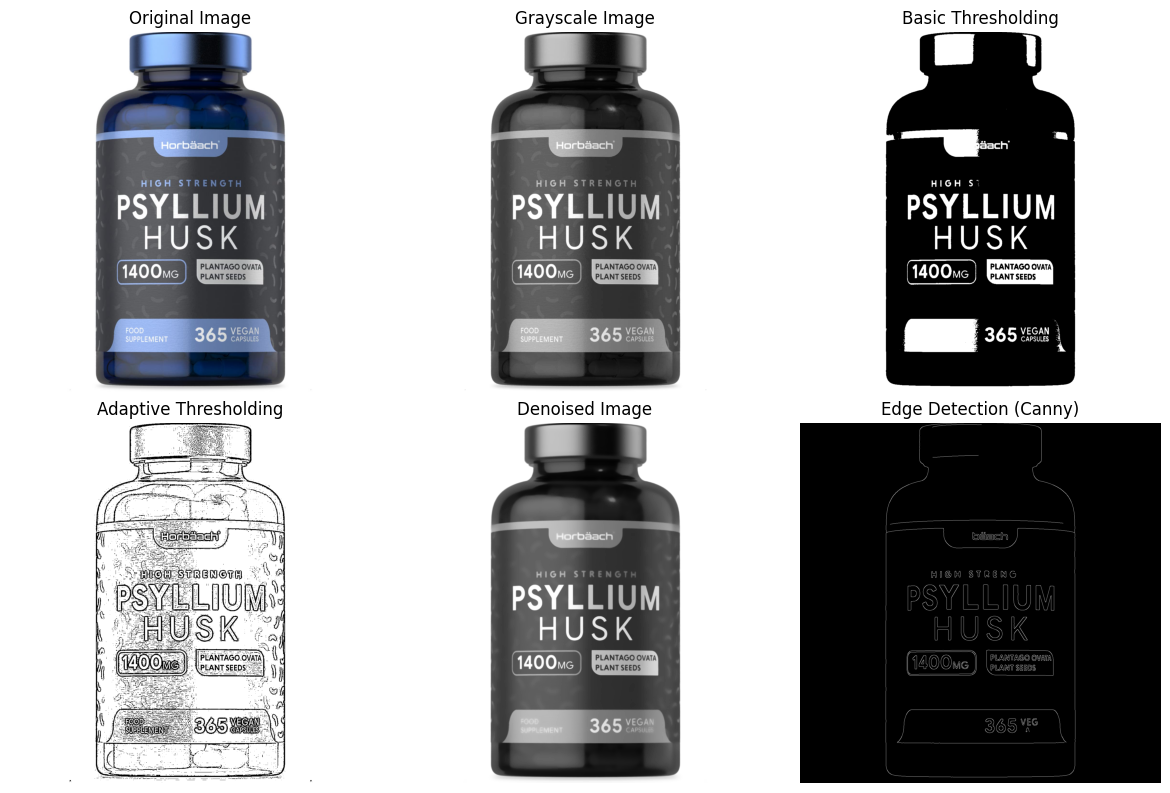

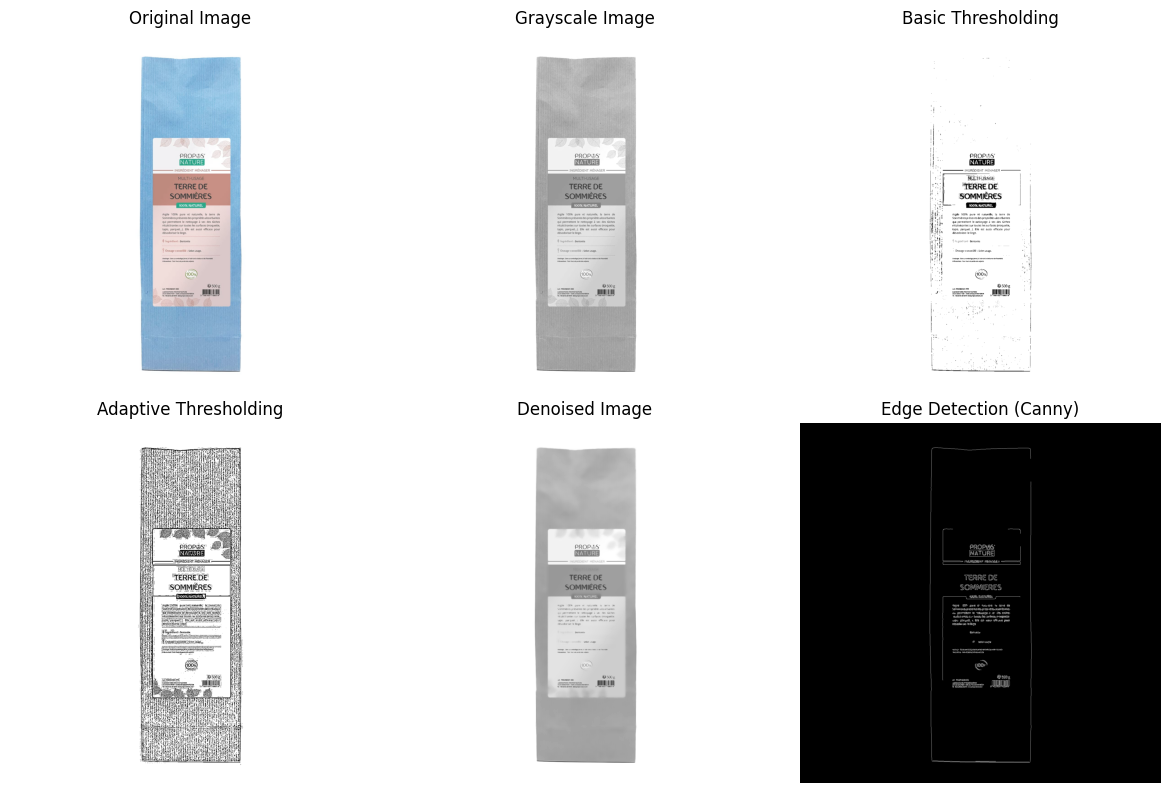

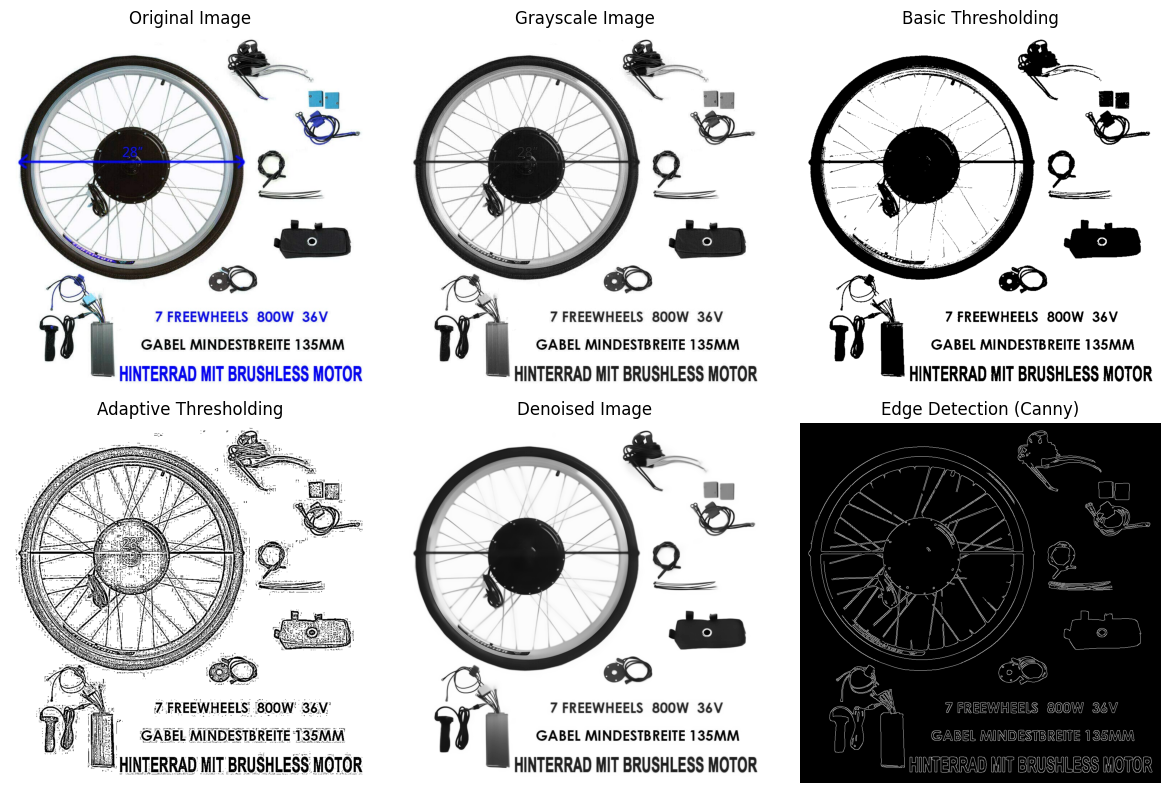

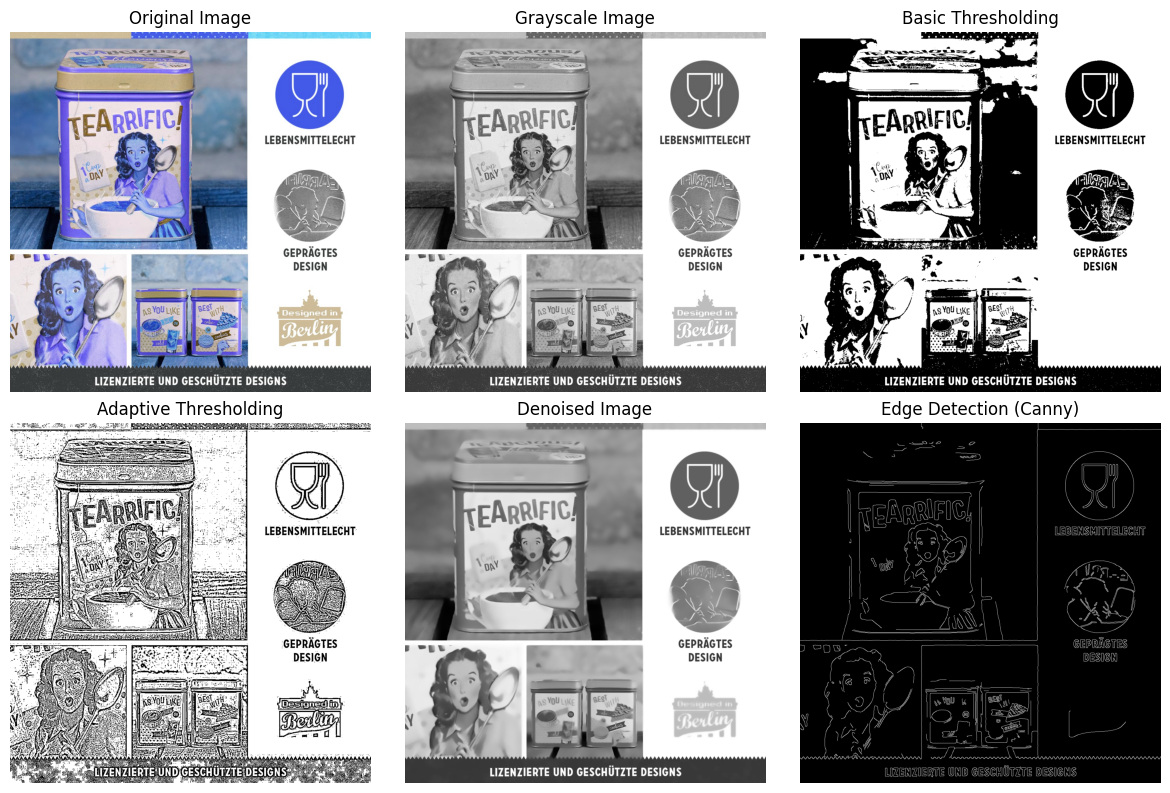

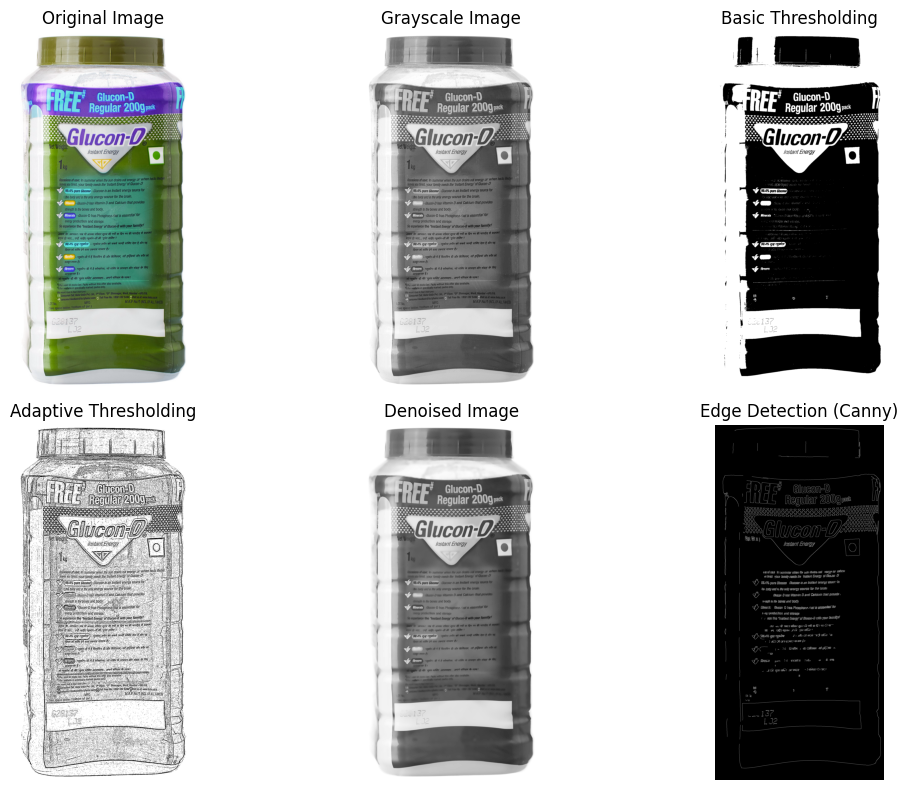

In [17]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def preprocess_img(image_path):
    # Open the image
    image = Image.open(image_path)
    original = np.array(image)
    
    # Convert to grayscale
    gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    
    # Apply basic thresholding (binarization)
    _, thresh_basic = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
    
    # Apply adaptive thresholding
    adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    
    # Apply denoising
    denoised = cv2.fastNlMeansDenoising(gray, None, 30, 7, 21)
    
    # Contrast adjustment
    contrast_image = cv2.convertScaleAbs(gray, alpha=1.5, beta=0)
    
    # Edge detection (Canny)
    edges = cv2.Canny(denoised, 100, 200)
    
    # Displaying the images
    fig, ax = plt.subplots(2, 3, figsize=(12, 8))
    ax[0, 0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    ax[0, 0].set_title('Original Image')
    ax[0, 0].axis('off')

    ax[0, 1].imshow(gray, cmap='gray')
    ax[0, 1].set_title('Grayscale Image')
    ax[0, 1].axis('off')
    
    ax[0, 2].imshow(thresh_basic, cmap='gray')
    ax[0, 2].set_title('Basic Thresholding')
    ax[0, 2].axis('off')

    ax[1, 0].imshow(adaptive_thresh, cmap='gray')
    ax[1, 0].set_title('Adaptive Thresholding')
    ax[1, 0].axis('off')

    ax[1, 1].imshow(denoised, cmap='gray')
    ax[1, 1].set_title('Denoised Image')
    ax[1, 1].axis('off')

    ax[1, 2].imshow(edges, cmap='gray')
    ax[1, 2].set_title('Edge Detection (Canny)')
    ax[1, 2].axis('off')

    plt.tight_layout()
    plt.show()

# Processing images from a folder
image_folder = '../del_images'  # Replace with your folder path
image_paths = [os.path.join(image_folder, fname) for fname in os.listdir(image_folder) if fname.endswith(('.jpg', '.png', '.jpeg'))]

for idx, image_path in enumerate(image_paths, 1):
    preprocess_img(image_path)


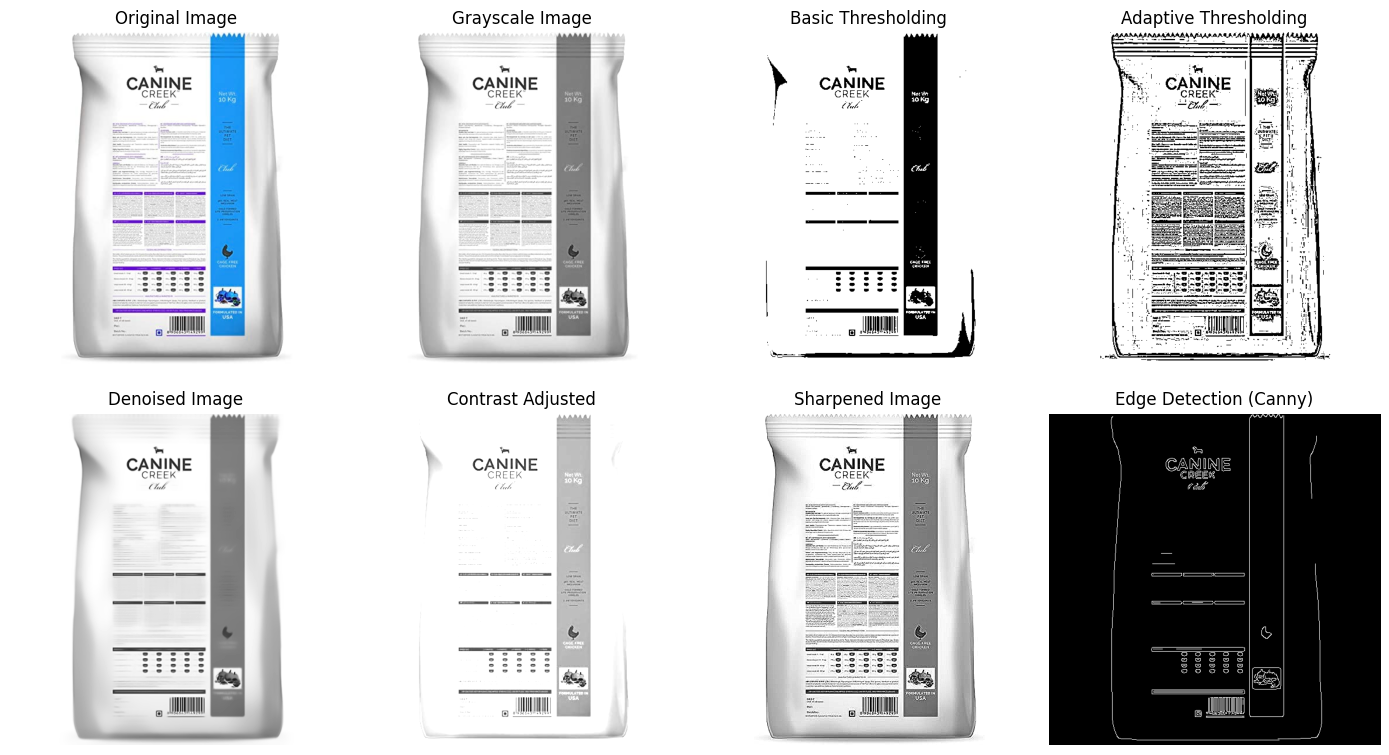

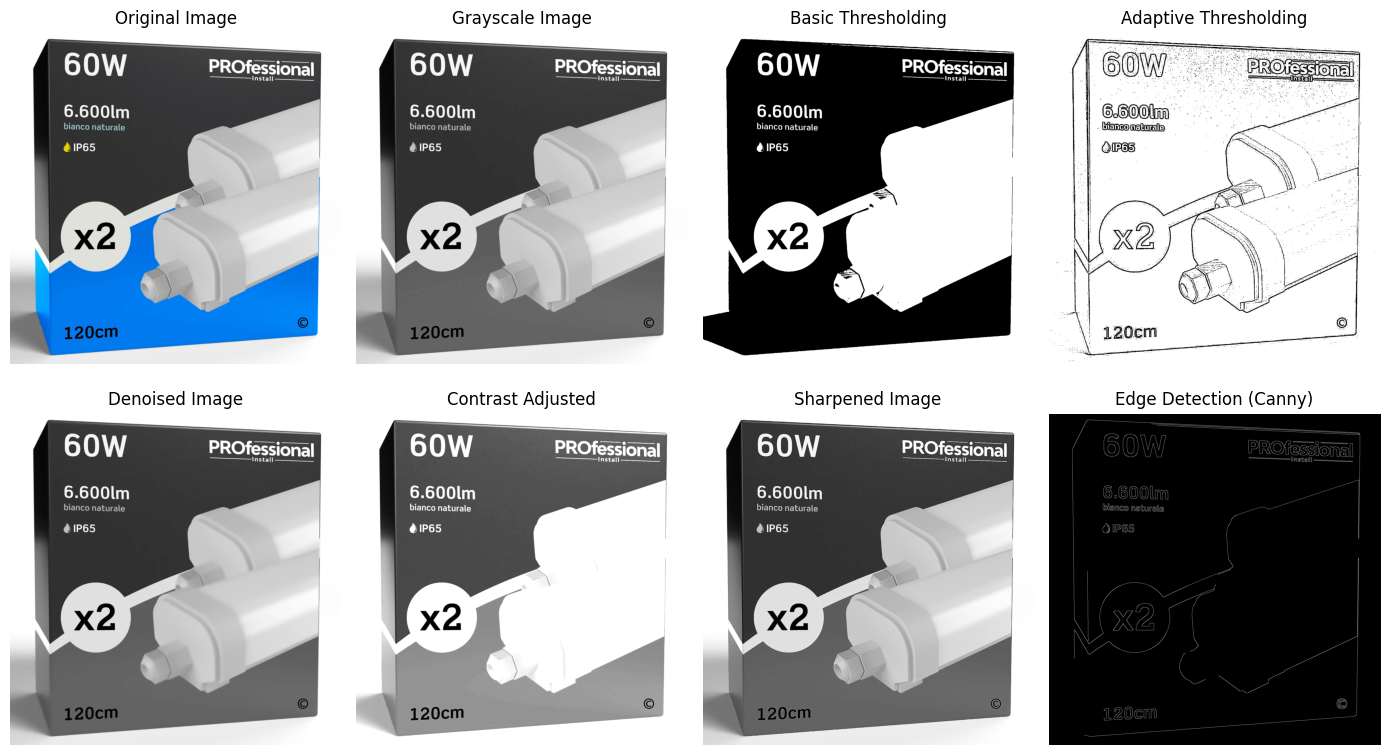

In [1]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def preprocess_img(image_path):
    # Open the image
    image = Image.open(image_path)
    original = np.array(image)
    
    # Convert to grayscale
    gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    
    # Apply basic thresholding (binarization)
    _, thresh_basic = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
    
    # Apply adaptive thresholding
    adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    
    # Apply denoising
    denoised = cv2.fastNlMeansDenoising(gray, None, 30, 7, 21)
    
    # Contrast adjustment
    contrast_image = cv2.convertScaleAbs(gray, alpha=1.5, beta=0)
    
    # Apply sharpening
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])  # Sharpening kernel
    sharpened = cv2.filter2D(gray, -1, kernel)
    
    # Edge detection (Canny)
    edges = cv2.Canny(denoised, 100, 200)
    
    # Displaying the images
    fig, ax = plt.subplots(2, 4, figsize=(14, 8))
    
    ax[0, 0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    ax[0, 0].set_title('Original Image')
    ax[0, 0].axis('off')

    ax[0, 1].imshow(gray, cmap='gray')
    ax[0, 1].set_title('Grayscale Image')
    ax[0, 1].axis('off')

    ax[0, 2].imshow(thresh_basic, cmap='gray')
    ax[0, 2].set_title('Basic Thresholding')
    ax[0, 2].axis('off')

    ax[0, 3].imshow(adaptive_thresh, cmap='gray')
    ax[0, 3].set_title('Adaptive Thresholding')
    ax[0, 3].axis('off')

    ax[1, 0].imshow(denoised, cmap='gray')
    ax[1, 0].set_title('Denoised Image')
    ax[1, 0].axis('off')

    ax[1, 1].imshow(contrast_image, cmap='gray')
    ax[1, 1].set_title('Contrast Adjusted')
    ax[1, 1].axis('off')

    ax[1, 2].imshow(sharpened, cmap='gray')
    ax[1, 2].set_title('Sharpened Image')
    ax[1, 2].axis('off')

    ax[1, 3].imshow(edges, cmap='gray')
    ax[1, 3].set_title('Edge Detection (Canny)')
    ax[1, 3].axis('off')

    plt.tight_layout()
    plt.show()

# Processing images from a folder
image_folder = '../del_images3'  # Replace with your folder path
image_paths = [os.path.join(image_folder, fname) for fname in os.listdir(image_folder) if fname.endswith(('.jpg', '.png', '.jpeg'))]

for idx, image_path in enumerate(image_paths, 1):
    preprocess_img(image_path)


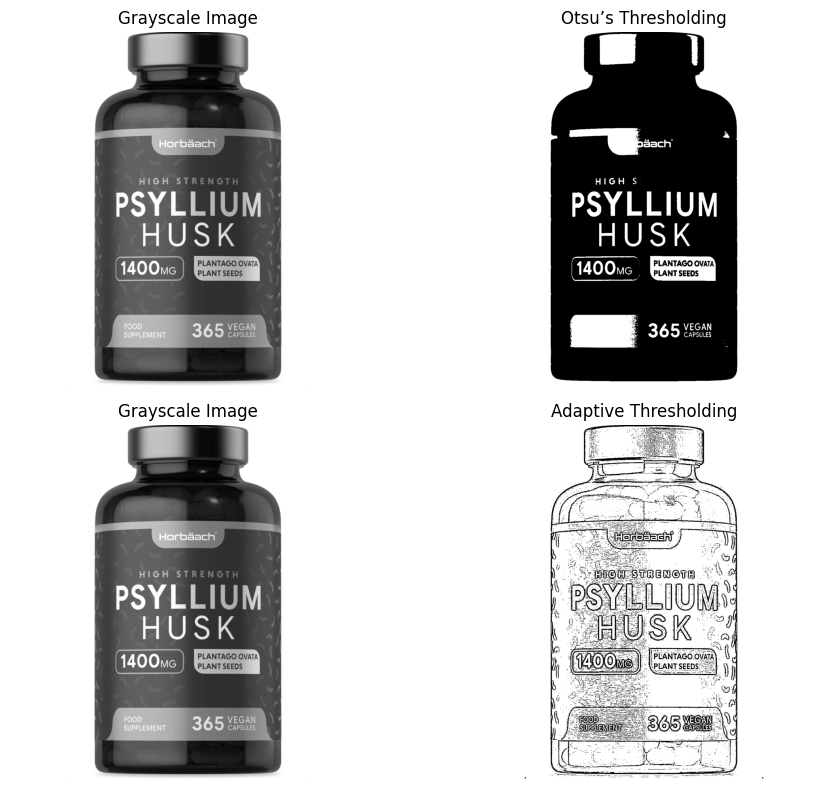

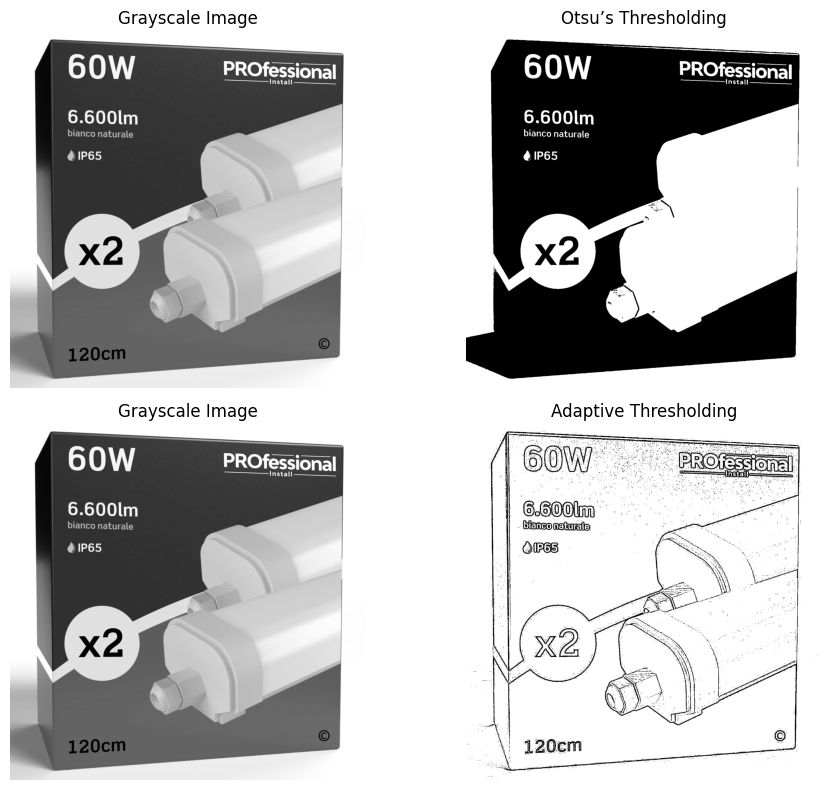

In [11]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def preprocess_img(image_path):
    # Open the image
    image = Image.open(image_path)
    original = np.array(image)
    
    # Convert to grayscale
    gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    
    # Apply Otsu’s Thresholding
    _, otsu_thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Apply Adaptive Thresholding
    adaptive_thresh = cv2.adaptiveThreshold(
        gray,
        255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        11,
        2
    )
    
    # Displaying the images in the requested order
    fig, ax = plt.subplots(2, 2, figsize=(10, 8))
    
    # First row: Grayscale, Otsu’s Thresholding
    ax[0, 0].imshow(gray, cmap='gray')
    ax[0, 0].set_title('Grayscale Image')
    ax[0, 0].axis('off')

    ax[0, 1].imshow(otsu_thresh, cmap='gray')
    ax[0, 1].set_title('Otsu’s Thresholding')
    ax[0, 1].axis('off')

    # Second row: Grayscale, Adaptive Thresholding
    ax[1, 0].imshow(gray, cmap='gray')
    ax[1, 0].set_title('Grayscale Image')
    ax[1, 0].axis('off')

    ax[1, 1].imshow(adaptive_thresh, cmap='gray')
    ax[1, 1].set_title('Adaptive Thresholding')
    ax[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Processing images from a folder
image_folder = '../del_images3'  # Replace with your folder path
image_paths = [os.path.join(image_folder, fname) for fname in os.listdir(image_folder) if fname.endswith(('.jpg', '.png', '.jpeg'))]

for idx, image_path in enumerate(image_paths, 1):
    preprocess_img(image_path)


<h2>experimenting by dividing images into small boxes and applying easyocr</h2>

In [25]:
import cv2
import numpy as np
from PIL import Image
import easyocr

# Load EasyOCR model
reader = easyocr.Reader(['en'])

def preprocess_image(image_path):
    # Open the image and convert to grayscale
    image = Image.open(image_path)
    gray = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)
    
    # Apply Otsu’s Thresholding
    _, otsu_thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return otsu_thresh

def divide_and_ocr(image, n):
    height, width = image.shape
    num_parts = 2 ** n
    part_size = int(max(height, width) / np.sqrt(num_parts))  # Size of each part

    detected_texts = []

    for i in range(num_parts):
        for j in range(num_parts):
            x_start = int(i * part_size)
            y_start = int(j * part_size)
            x_end = min(x_start + part_size, width)
            y_end = min(y_start + part_size, height)

            # Ensure the part is not empty
            if x_end > x_start and y_end > y_start:
                # Crop the image to the current part
                part = image[y_start:y_end, x_start:x_end]

                # Check if the part is valid
                if part.size > 0:
                    # Perform OCR on the part
                    ocr_result = reader.readtext(part, detail=0)  # Use detail=0 for text only
                    
                    # Concatenate detected text
                    detected_texts.append(' '.join(ocr_result))

    # Combine all detected texts into a single space-separated string
    combined_text = ' '.join(detected_texts)
    return combined_text

def process_image(image_path, max_iterations):
    otsu_thresh = preprocess_image(image_path)
    
    for n in range(max_iterations):
        print(f"Processing with 2^{n} parts")
        combined_text = divide_and_ocr(otsu_thresh, n)
        print(f"Detected text for 2^{n} parts: {combined_text}")

# Path to your image 
# image_path = r'..\del_images3\61Fwq4GeTmL.jpg'  # Replace with your image path
image_path = r'..\del_images3\617Tl40LOXL.jpg'  # Replace with your image path
# image_path = r'..\del_images3\41EjbFu-+yL.jpg'  # Replace with your image path

# Maximum number of iterations (e.g., 3 for 2^3 = 8 parts)
max_iterations = 5

# Process the image
process_image(image_path, max_iterations)


Processing with 2^0 parts
Detected text for 2^0 parts: Daach AlGH $ PSYLLIUM HUSK PLANTAGO OVATA 1400mG PLANT SEEDS 365 VEGAN CAPSULES
Processing with 2^1 parts
Detected text for 2^1 parts: Daach AlGH $ PSYLLIUM HUSK PLANTAGO OVATA 1400mG PLANT SEEDS 365 VEGAN CAPSULES  
Processing with 2^2 parts
Detected text for 2^2 parts: Aigh S DGvI VO 4 |9 HU 140OmG 3ACh IIM A 0 T/n Sk PLANTAGO OVATA PLANT SEEDS 365 VEGANN CAPSULES
Processing with 2^3 parts
Detected text for 2^3 parts:  PS 14  Saach HIGH $ SYLLIUM HUSK PLANTAGO OVATA OomG PLANT SEEDS 365 YEGAN CAPSULES   
Processing with 2^4 parts
Detected text for 2^4 parts:      Aigh 5 DGvI M O ULa HU 140OmG   aAch IIM A 0 T/n Sk PLANTAGO OVATA PLANT SEEDS 365 VEGAN CAPSULES    


In [28]:
# Sliding window approach
def sliding_window_ocr(image, window_size, step_size):
    height, width = image.shape
    detected_texts = []

    for y in range(0, height - window_size[1], step_size):
        for x in range(0, width - window_size[0], step_size):
            # Define the window
            window = image[y:y+window_size[1], x:x+window_size[0]]
            
            if window.size > 0:
                # Perform OCR on the window
                ocr_result = reader.readtext(window, detail=0)
                detected_texts.append(' '.join(ocr_result))

    combined_text = ' '.join(detected_texts)
    return combined_text

def process_image(image_path):
    otsu_thresh = preprocess_image(image_path)
    
    window_size = (100, 100)  # Define window size (width, height)
    step_size = 50  # Define step size for sliding window

    combined_text = sliding_window_ocr(otsu_thresh, window_size, step_size)
    print(f"Detected text using sliding window: {combined_text}")

# Process the image
image_path = r'..\del_images3\617Tl40LOXL.jpg'  # Replace with your image path
process_image(image_path)


Detected text using sliding window:                                                                                                                                                                                                                                               5az 3ACt Ich                          Saz BACt Ich                                                  H 4GF G H 4 5 5                        H 416 F 6G H 5 5                      D D( 6 V VI 4      M V                P PS 0 )y YCL I ~L L -/ IU UI M                            Pn                   1 H 1 U U J < S 3 h K                     T N I ( U J ` 0 J ( n                    1A( Aac Ja    PLA PLANTF NTAGO IGOOV OVATA ATA                 14 4OC JOn JMG AG )( PLA PLA PLANTE PLANT NTAGO NT SEED IgoOv SEEDS OVATA DS ATA                 Jet #  JUn JMG 1G 4(F PLA PLANT NT SEED SEEDS DS                                                                                  L Ve VcCE ECaN 1N                      3 36 65 5 YE Cf VEG

In [29]:
# Text Region Detection with Contours

def detect_text_regions(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    detected_texts = []

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        text_region = image[y:y+h, x:x+w]

        if text_region.size > 0:
            # Perform OCR on the text region
            ocr_result = reader.readtext(text_region, detail=0)
            detected_texts.append(' '.join(ocr_result))

    combined_text = ' '.join(detected_texts)
    return combined_text

def process_image(image_path):
    otsu_thresh = preprocess_image(image_path)
    
    combined_text = detect_text_regions(otsu_thresh)
    print(f"Detected text using contour detection: {combined_text}")

# Process the image
image_path = r'..\del_images3\617Tl40LOXL.jpg'  # Replace with your image path
process_image(image_path)


Detected text using contour detection: Daach AlGH $ PSYLLIUM HUSK PLANTAGO OVATA 1400mG PLANT SEEDS 365 VEGAN CAPSULES


In [32]:
# Region-based OCR with Adaptive Thresholding
import os
import cv2
import easyocr

# Initialize the OCR reader
reader = easyocr.Reader(['en'])

def adaptive_threshold_ocr(image):
    detected_texts = []
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    
    contours, _ = cv2.findContours(adaptive_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        text_region = image[y:y+h, x:x+w]

        if text_region.size > 0:
            # Perform OCR on the text region
            ocr_result = reader.readtext(text_region, detail=0)
            detected_texts.append(' '.join(ocr_result))

    combined_text = ' '.join(detected_texts)
    return combined_text

def process_directory(directory_path):
    image_paths = [os.path.join(directory_path, fname) for fname in os.listdir(directory_path) if fname.lower().endswith(('.jpg', '.png', '.jpeg'))]

    for image_path in image_paths:
        image = cv2.imread(image_path)
        if image is not None:
            combined_text = adaptive_threshold_ocr(image)
            print(f"Detected text for image {os.path.basename(image_path)}: {combined_text}")
        else:
            print(f"Failed to load image {image_path}")

# Directory containing images
image_directory = r'..\images'  # Replace with your directory path
process_directory(image_directory)


Detected text for image 41-NCxNuBxL.jpg: 2OCM 1SCM
Detected text for image 417NJrPEk+L.jpg: Deodorizing module Cat litter shovel Adsorb barmful gubatances and reduce odor Regardless of soll gand, wood sand, crystal sand alter unused cat IItter
Detected text for image 417SThj+SrL.jpg:   Professional tools Blade Diameter Sosrmi Rated Voltage: 22Ol" Frecueniv J0HZ Rare din"t Pote Z10057 Loadciced: 5hpin Capacity S*Kin $ Wocm Max Cutting Cepacity: 68 HO)x W6m Max Cutting C-pacity: 45" H6o x W2Mirmn Curte
Detected text for image 41ADVPQgZOL.jpg:                                                           Calabrian Powder Chili 
Detected text for image 41nblnEkJ3L.jpg: LED OSRAM 55w2 40w 470 Im Wamm White B22d
Detected text for image 41o3iis9E7L.jpg: Ideal Bed & Armchair Cover Neat size foldaway Reversible; black on one side grey on the other Sturdy & lightweight 2.6 Ibs 1.2 kg TGCcm
Detected text for image 41pvwR9GbaL.jpg:                                                                       